In [1]:
import pandas as pd

data = pd.read_excel("turret-calibration-use.xlsx", sheet_name="TurretEncoder calibration data")

In [2]:
data

,motorAngle,potentiometerVoltage,potentiometerAngle,Diff,Pot Rotations
0,-170.781342,0.234375,-169.552364,-1.228977,0.710227
1,-170.781342,0.234375,-169.513195,-1.268147,0.710227
2,-170.781342,0.234375,-169.513195,-1.268147,0.710227
3,-170.781342,0.234375,-169.513195,-1.268147,0.710227
4,-170.686127,0.234375,-169.367590,-1.318537,0.710227
...,...,...,...,...,...
1973,170.035889,2.964844,170.871979,-0.836090,8.984375
1974,170.035889,2.964844,170.891418,-0.855530,8.984375
1975,170.035889,2.964844,170.818298,-0.782410,8.984375
1976,170.035889,2.964844,170.863342,-0.827454,8.984375


In [3]:
potentiometerVoltage_data = data.drop(columns=["Diff", "Pot Rotations", "potentiometerAngle"])
potentiometerVoltage_data.columns

Index(['motorAngle', 'potentiometerVoltage'], dtype='object')

In [4]:
potentiometerVoltage_data

,motorAngle,potentiometerVoltage
0,-170.781342,0.234375
1,-170.781342,0.234375
2,-170.781342,0.234375
3,-170.781342,0.234375
4,-170.686127,0.234375
...,...,...
1973,170.035889,2.964844
1974,170.035889,2.964844
1975,170.035889,2.964844
1976,170.035889,2.964844


## Now bucket the data

In [5]:

samplesPerDegree=4 # COntrols resolutation
potentiometerVoltage_data["angle_bucket"] = potentiometerVoltage_data.apply(lambda row: round(row["motorAngle"]*samplesPerDegree)/samplesPerDegree, axis=1)
potentiometerVoltage_data

,motorAngle,potentiometerVoltage,angle_bucket
0,-170.781342,0.234375,-170.75
1,-170.781342,0.234375,-170.75
2,-170.781342,0.234375,-170.75
3,-170.781342,0.234375,-170.75
4,-170.686127,0.234375,-170.75
...,...,...,...
1973,170.035889,2.964844,170.00
1974,170.035889,2.964844,170.00
1975,170.035889,2.964844,170.00
1976,170.035889,2.964844,170.00


## Now get one from each group

In [6]:
one_data_point_per_group = potentiometerVoltage_data.groupby(["angle_bucket"]).first()

In [7]:
one_data_point_per_group

,motorAngle,potentiometerVoltage
angle_bucket,,
-170.75,-170.781342,0.234375
-170.50,-170.509262,0.238281
-170.25,-170.332428,0.238281
-170.00,-169.965134,0.238281
-169.75,-169.788284,0.242188
...,...,...
169.00,168.988403,2.960938
169.25,169.165268,2.957031
169.50,169.532562,2.960938


In [8]:
# Add in ideal voltage
one_data_point_per_group.columns


Index(['motorAngle', 'potentiometerVoltage'], dtype='object')

In [9]:
one_data_point_per_group

,motorAngle,potentiometerVoltage
angle_bucket,,
-170.75,-170.781342,0.234375
-170.50,-170.509262,0.238281
-170.25,-170.332428,0.238281
-170.00,-169.965134,0.238281
-169.75,-169.788284,0.242188
...,...,...
169.00,168.988403,2.960938
169.25,169.165268,2.957031
169.50,169.532562,2.960938


In [10]:
# https://stackoverflow.com/questions/32460593/including-the-group-name-in-the-apply-function-pandas-python
one_data_point_per_group["idealVoltage"] = one_data_point_per_group.apply(lambda row: (row["motorAngle"]+180)/360.0*3.3, axis=1)

<AxesSubplot: xlabel='angle_bucket'>

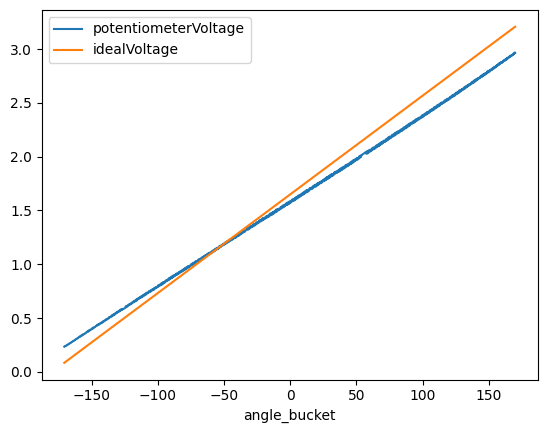

In [11]:
one_data_point_per_group.drop(columns=["motorAngle"]).plot()

# Prepare data for output


In [12]:
result_data = one_data_point_per_group.drop(columns=["idealVoltage"])
result_data.rename(columns={"potentiometerVoltage": "voltage"}, inplace=True)
result_data

,motorAngle,voltage
angle_bucket,,
-170.75,-170.781342,0.234375
-170.50,-170.509262,0.238281
-170.25,-170.332428,0.238281
-170.00,-169.965134,0.238281
-169.75,-169.788284,0.242188
...,...,...
169.00,168.988403,2.960938
169.25,169.165268,2.957031
169.50,169.532562,2.960938


In [13]:
result = result_data.to_json(orient="records", indent=4)
with open("turrent-encoder-data-processed.json", "w") as f:
    f.write(result)

In [14]:
result

'[\n    {\n        "motorAngle":-170.7813415527,\n        "voltage":0.234375\n    },\n    {\n        "motorAngle":-170.509262085,\n        "voltage":0.23828125\n    },\n    {\n        "motorAngle":-170.3324279785,\n        "voltage":0.23828125\n    },\n    {\n        "motorAngle":-169.965133667,\n        "voltage":0.23828125\n    },\n    {\n        "motorAngle":-169.7882843018,\n        "voltage":0.2421875\n    },\n    {\n        "motorAngle":-169.6114349365,\n        "voltage":0.2421875\n    },\n    {\n        "motorAngle":-169.2441253662,\n        "voltage":0.2421875\n    },\n    {\n        "motorAngle":-169.0672912598,\n        "voltage":0.24609375\n    },\n    {\n        "motorAngle":-168.6999969482,\n        "voltage":0.25\n    },\n    {\n        "motorAngle":-168.5231323242,\n        "voltage":0.25\n    },\n    {\n        "motorAngle":-168.346282959,\n        "voltage":0.25\n    },\n    {\n        "motorAngle":-167.9789886475,\n        "voltage":0.25390625\n    },\n    {\n       